## Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.



Sample Dataset :- https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from textblob import TextBlob
import matplotlib.pyplot as plt


df = pd.read_csv("C:/Users/abhin/Downloads/twitter_training.csv")

In [10]:
df.columns = ['ID', 'Category', 'Sentiment', 'Text']
print(df.head())

     ID     Category Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None


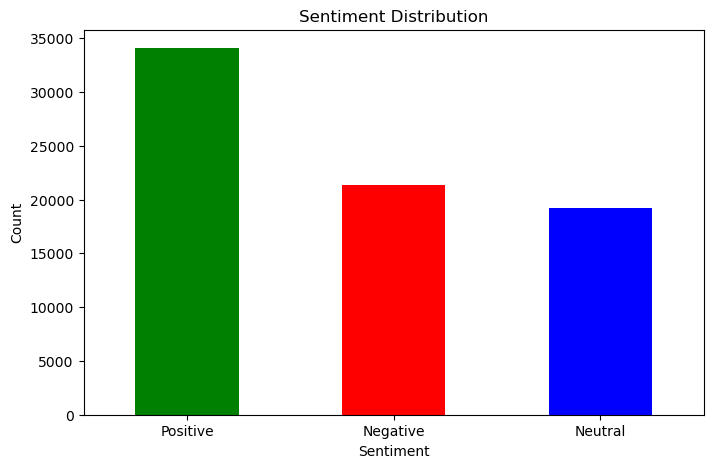

In [11]:
df['Polarity'] = df['Text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Analyzed_Sentiment'] = df['Polarity'].apply(classify_sentiment)

# Plot sentiment distribution
sentiment_counts = df['Analyzed_Sentiment'].value_counts()

# Visualization
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()